## Semaine 6: Équations différentielles ordinaires

In [1]:
using LaTeXStrings
using LinearAlgebra
using Plots

### <font color='orange'>[Exercice 1]</font> Problème de la couche limite de Blasius

Le problème de la vitesse d'un fluide visqueux newtonien s'écoulant parallèlement à une plaque plane, dans un régime laminaire à nombre de Reynolds élevé, se résout en raccordant une solution triviale (écoulement uniforme) en champ lointain et une solution de couche limite au voisinage de la plaque pour respecter la condition de vitesse nulle. Sans rentrer dans les détails relevant du cours de mécanique des fluides, on rappelle que ce problème de couche limite,
après adimensionnement, se ramène à la résolution de l'équation différentielle suivante
$$
2g'''+g\,g''=0
\quad\textrm{et}\quad
\left\{
\begin{array}{rcl}
g(0)&=&0\\
g'(0)&=&0\\
\lim_{t\to\infty}g'(t)&=&1
\end{array}
\right.
$$

A des normalisations près, $t$ représente ici l'abscisse perpendiculaire à la plaque et $u=g'$ est la vitesse du fluide dans la direction de la plaque.

Il apparaît de prime abord que ce problème ne relève pas *stricto sensu* des résultats vus en cours car d'une part il s'agit d'un problème impliquant des dérivées strictement supérieures à 1 et d'autre part les conditions aux limites devant être respectées par la solution impliquent à la fois les valeurs de $g$ et $g'$ à $t=0$ mais également de $g'$ à $t\to\infty$.

La stratégie mise en place ici pour résoudre ce problème est le recours à la méthode dite **méthode de tir** : elle consiste à se ramener à une équation différentielle d'ordre 1 vectorielle en dimension 3 et à omettre provisoirement la condition $\lim_{t\to\infty}g'(t)=1$ pour la remplacer par une nouvelle condition en $t=0$ à savoir $g''(0)=λ$ avec $λ$ un paramètre qu'il s'agira ensuite d'ajuster pour satisfaire la condition à l'infini.

1. Montrer que l'on se ramène à une équation différentielle ordinaire d'ordre 1 de type
     <a id="ode"></a>
    $$
    \tag{1}
    x'(t)=f\bigl(x(t)\bigr), \qquad x(0)=\begin{pmatrix} 0 \\ 0 \\ λ \end{pmatrix}
    $$
   en considérant la fonction vectorielle inconnue de $\mathbb{R}$ dans $\mathbb{R}^3$
    $$
    \begin{array}{rccl}
    x :&
    [0,\infty[&→&\mathbb{R}^3 \\
    &t&↦&x(t)=   \begin{pmatrix}
                g(t)\\
                g'(t)\\
                g''(t)
                \end{pmatrix}
    \end{array}
    $$
    et la fonction de $\mathbb{R}^3$ dans $\mathbb{R}^3$
    $$
    \begin{array}{rccl}
    f :&
    \mathbb{R}^3&→&\mathbb{R}^3 \\
    &x&↦&f(x)=   \begin{pmatrix}
                x_2\\
                x_3\\
                -\frac{x_1\,x_3}{2}
                \end{pmatrix}
    \end{array}
    $$

    Construire les fonctions `f_Blasius` et `df_Blasius` prenant comme argument un vecteur de dimension 3 `x` et renvoyant respectivement le vecteur $f(x)$ et la matrice jacobienne $∇f(x)$.

In [7]:
function f_Blasius(x)
    ### BEGIN SOLUTION
    [x[2], x[3], -x[1]*x[3]/2]
    ### END SOLUTION
end

function df_Blasius(x)
    ### BEGIN SOLUTION
    [      0   1       0
           0   0       1
     -x[3]/2   0 -x[1]/2]
    ### END SOLUTION
end;

2. Implémenter une fonction `newton_raphson(x, f, df, maxiter=100; ε = 1e-12)` **dans le cadre général d'une fonction vectorielle** renvoyant le résultat de l'algorithme de Newton-Raphson partant d'un point initial `x` pour une fonction `f` de jacobienne `df` avec un nombre d'itérations maximal `maxiter` ($100$ par défaut) et une tolérance `ε` ($10^{-12}$ par défaut) pour un critère d'arrêt $\lVert f(x) \rVert<ε$.

In [8]:
function newton_raphson(x, f, df, maxiter=100; ε = 1e-12)
    ### BEGIN SOLUTION
    for _ in 1:maxiter
        x -= df(x)\f(x)
        norm(f(x)) < ε && return x
    end
    error("Failed to converge!")
    ### END SOLUTION
end;


3. On donne ci-dessous les codes renvoyant l'itération suivante des schémas d'Euler explicite et implicite à partir de la valeur précédente `xₙ`, l'incrément `Δ` de la variable $t$ ainsi que la fonction `f` décrivant l'équation différentielle <a href="#ode">(1)</a> et éventuellement la jacobienne `df` de `f` si elle est nécessaire dans le schéma (on notera que si celle-ci n'est pas nécessaire on peut remplacer l'argument `df` par `_` pour éviter de le nommer mais il est important de garder ce 4ème argument pour respecter la même signature pour tous les schémas)
   Implémenter de manière analogue les schémas de `Crank_Nicolson` et de `Heun`

   <details>
        <summary>
            <em><font color='gray'>Indication (cliquer pour afficher)</font></em>
        </summary>
       
    On rappelle, pour une ODE générale $\partial_t x(t) = f(t,x(t))$, les schémas de Heun et Crank-Nicolson.
   
   - <b>Heun</b>: $$ x_{n+1} = x_n + \frac{\Delta}{2}\left[f(t_n,x_n)+f\left(t_{n+1},x_n + \Delta f(t_n,x_n)\right)\right] $$
   - <b>Crank-Nicolson</b>: $$ x_{n+1} = x_n + \frac{\Delta}{2}\left[f(t_n,x_n)+f(t_{n+1},x_{n+1})\right] $$

    La méthode de Crank-Nicolson, contrairement à la méthode de Heun, est une méthode <u>implicite</u>.
    </details>
   

In [9]:
Euler_exp(xₙ, Δ, f, _) = xₙ + Δ*f(xₙ)
Euler_imp(xₙ, Δ, f, df) = newton_raphson(xₙ, x -> x-xₙ-Δ*f(x), x -> I-Δ*df(x))

function Crank_Nicolson(xₙ, Δ, f, df)
    ### BEGIN SOLUTION
    newton_raphson(xₙ, x -> x-xₙ-Δ/2*(f(x)+f(xₙ)), x -> I-Δ/2*df(x))
    ### END SOLUTION
end

function Heun(xₙ, Δ, f, _)
    ### BEGIN SOLUTION
    xₙ + Δ/2 * (f(xₙ) + f(xₙ + Δ*f(xₙ)))
    ### END SOLUTION
end;

4. Implémenter un solveur générique `solve_ode(x₀, tᶠ, Δ ; alg=Euler_exp)` prenant comme arguments

    - le vecteur initial `x₀`,

    - la valeur finale `tᶠ` de l'intervalle de résolution (ne pouvant bien sûr pas prendre l'infini dans une résolution numérique. On supposera dans la suite que la valeur de $10$ sera suffisante pour représenter une valeur grande en notant que l'échelle de grandeur de $t$ fournie par une analyse dimensionnelle de l'équation différentielle initiale est l'unité),

    - le pas de résolution `Δ`,

    - `alg` le choix du schéma (parmi les fonctions implémentées à la question précédente ou d'autres que vous voudriez tester...).

    Ce solveur générique devra renvoyer les tableaux des valeurs de $t$ (vecteur de scalaires) et de $x$ (vecteur de vecteurs de $\mathbb{R}^3$).

In [10]:
function solve_ode(x₀, tᶠ, Δ; alg=Crank_Nicolson)
    X = [x₀]
    T = [0.]
    ### BEGIN SOLUTION
    while T[end] < tᶠ
        push!(T, T[end]+Δ)
        push!(X, alg(X[end], Δ, f_Blasius, df_Blasius))
    end
    ### END SOLUTION
    return T, X
end;

5. Tester la résolution en traçant pour les différents algorithmes $t$ en fonction de $g'(t)=x_2(t)$ (il suffit d'inverser les axes pour que $t$ représente l'axe des ordonnées et $g'(t)$ la vitesse du fluide parallèle à l'axe des $x$). On choisira $x_0=(0, 0, 0.2)$ puis $x_0=(0, 0, 0.5)$. Conjecturer l'existence d'un $λ$ permettant de satisfaire la condition à l'infini.

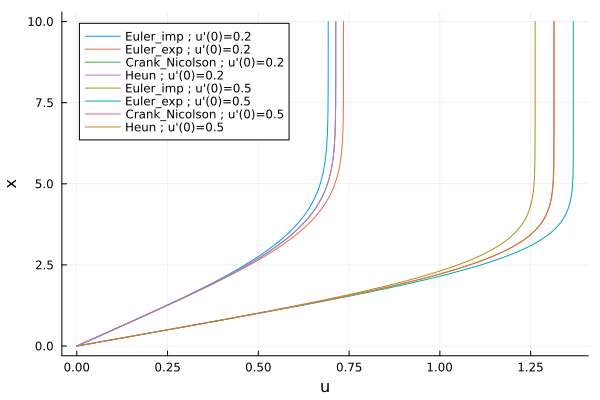

In [11]:
tᶠ = 10.
Δ = tᶠ/101

pl=plot(xlabel="u", ylabel="x")
for λ in (0.2, 0.5)
    x₀ = [0., 0., λ]
    for alg in (Euler_imp, Euler_exp, Crank_Nicolson, Heun)
        ### BEGIN SOLUTION
        T, X = solve_ode(x₀, tᶠ, Δ; alg=alg)
        plot!(pl, [x[2] for x in X], T, label="$alg ; u'(0)=$λ")
        ### END SOLUTION
    end
end
pl

6.  Pour trouver la valeur adéquate de $λ$, on se propose de mettre en œuvre l'algorithme de Newton-Raphson sur une fonction scalaire prenant comme argument $λ$ et qui s'annule lorsque l'estimation de la valeur à l'infini de $g'$ est respectée (autrement dit $x_2(t^f)-1=0$). Cette fonction impose donc la résolution numérique complète de l'équation différentielle puisqu'elle fait intervenir $x_2(t^f)$. Il n'est donc pas question de pouvoir la différentier par rapport à $λ$ à la main.
    C'est pourquoi on se propose de s'appuyer sur la notion de différentiation automatique vue au TD précédent.
    On va utiliser l'implémentation fournie par la bibliothèque `ForwardDiff`.

    Voici un exemple de calcul automatique de la dérivée d'une fonction à une variable.
      ```julia
      using ForwardDiff
      f(x) = exp(sin(x)^2)
      ForwardDiff.derivative(f, 2.)  # derivative of f at x = 2.0
    ```
    De manière analogue à ce qui a été vu au TD précédent, il est aussi possible de manipuler directement l'implémentation de `ForwardDiff` des nombres duaux:
    ```julia
      import ForwardDiff:Dual
      x = Dual(2., 1.)
    ```
    On a initialisé un nombre dual. Le premier argument dans le constructeur contient sa valeur scalaire, et le deuxième contient sa dérivée par rapport au paramètre d'intérêt, qui n'est autre que `x` lui-même. Pour récupérer la valeur de la fonction et sa dérivée par rapport à `x`, on peut utiliser la syntaxe suivante:
    ```julia
      result = f(x)
      f_x = result.value # f(2.0)
      df_x = result.partials[1] #f'(2.0)
    ```

    Il est pratique d'introduire un nombre dual représentant une dérivée générique, comme dans le TD précédent:
    ```julia
      const dx = Dual(0.,1.)
      result = f(2.0 + dx) # équivalent à f(Dual(2.0,1.0))
    ```

    <details>
        <summary>
            <em><font color='gray'> Pour aller plus loin (cliquer pour afficher)</font></em>
        </summary>
        
    En fait, l'implémentation de `ForwardDiff` est bien plus puissante (car générique), et permet de calculer les dérivées d'ordre supérieur de la même façon. L'astuce consiste à construire des <b>nombres duaux de nombres duaux</b>:

    ```julia
      x = 2.0
      x_dx = Dual(x,1.0) # nombre dual d'ordre 1
      x_dx_dxx = Dual(x_dx,1.0) # nombre dual d'ordre 2

      result = f(x_dx_dxx) # nombre dual d'ordre 2. `result.value` et `result.partials[1]` sont tous les deux des nombres duaux d'ordre 1

      @assert result.value isa Dual
      @assert result.partials[1] isa Dual

      f_x = result.value.value # f(x)
      df_x = result.value.partials[1] # f'(x)
      df_x_alt = result.partials[1].value # également f'(x)
      d2f_x = result.partials[1].partials[1] # f''(x)
    ```
    <b>ATTENTION</b>: cette méthode devient <b>très</b> inefficace pour des dérivées d'ordre grand, car de nombreuses dérivées égales par le théorème de Schwartz n'ont pas besoin d'être recalculées (dans l'exemple ci-dessus on voit que $f'(x)$ est calculée deux fois).

    À titre d'exemple, on montre qu'on peut utiliser cette stratégie pour surcharger l'opérateur `adjoint` (`adjoint(x)` est syntactiquement équivalent à `x'`) de facon à ce que, appliqué à une fonction réelle, il renvoie une nouvelle fonction égale à sa dérivée. On peut récupérer les dérivées supérieures en appliquant l'opérateur de manière itérée.

    ```julia
    import Base: adjoint
    adjoint(f::Function) = x->f(Dual(x,1.0)).partials[1]
    f'(2.0) # dérivée de f en x=2
    f''(2.0) # dérivée seconde de f en x=2
    ```
    Et ainsi de suite...
    ```julia
    X = randn(100)
    @assert all(cos''''''.(X) .== -cos.(X))
    ```
    </details>


    Ecrire une fonction de résolution par Newton-Raphson `newton_raphson_dual(x, f, maxiter=100; ε = 1e-12)` d'une fonction scalaire `f` dans laquelle la dérivée de `f` au point courant sera obtenue par exploitation des nombres duaux.

In [16]:
using ForwardDiff

const dx = ForwardDiff.Dual(0,1)

function newton_raphson_dual(x, f, maxiter=100; ε = 1e-12)
    ### BEGIN SOLUTION
    for i in 1:maxiter
        y = f(x+dx)
        x -= y.value/y.partials[1]
        norm(f(x)) < ε && return x
    end
    error("Failed to converge!")
    ### END SOLUTION
end;

7. Implémenter la fonction `shooting_residual(λ, tᶠ, Δ; alg=Crank_Nicolson)` devant s'annuler lorsque la résolution respecte la condition estimée "à l'infini".

In [17]:
function shooting_residual(λ, tᶠ, Δ; alg=Crank_Nicolson)
    ### BEGIN SOLUTION
    _, X = solve_ode([0., 0., λ], tᶠ, Δ; alg=alg)
    return X[end][2] - 1.
    ### END SOLUTION
end;

8. Tester la résolution de la valeur de $λ$ en appliquant l'algorithme de Newton-Raphson à la fonction `shooting_residual`,
   et tracer les courbes donnant les valeurs de $λ$ en fonction de $Δ$ pour les différents schémas.
    <details>
        <summary>
            <em><font color='gray'>Indication (cliquer pour afficher)</font></em>
        </summary>

    Attention, la fonction `newton_raphson_dual` est implémentée avec une fonction `f` ne dépendant que d'un seul argument donc il faut se ramener à une fonction déduite de `shooting_residual` qui ne dépend plus que du seul argument `λ`.
    Il suffit pour cela de fixer localement les valeurs de autres arguments `tᶠ`, `Δ` et `alg` et d'appeler `newton_raphson_dual` avec la fonction anonyme `λ -> shooting_residual(λ, tᶠ, Δ; alg=alg)`.
    </details>

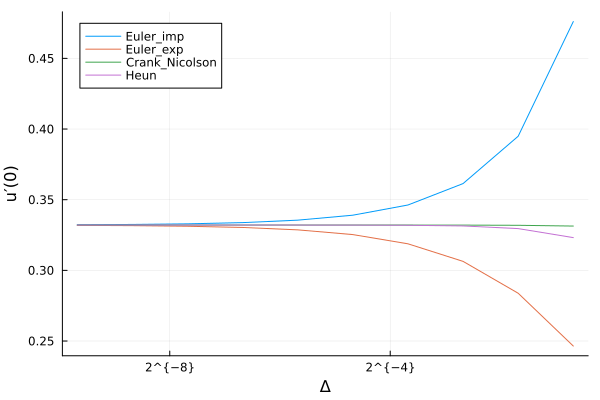

In [18]:
lΔ = tᶠ ./ (2 .^(4:13))
pl = plot(xlabel="Δ", ylabel="u′(0)", xaxis=:log2)
for alg in (Euler_imp, Euler_exp, Crank_Nicolson, Heun)
    ### BEGIN SOLUTION
    lλ = [newton_raphson_dual(0., λ -> shooting_residual(λ, tᶠ, Δ; alg=alg)) for Δ in lΔ]
    plot!(pl, lΔ, lλ, label=alg)
    ### END SOLUTION
end
pl

9. En déduire une bonne estimation de $λ$ et tracer à nouveau le profil de vitesse (i.e. $t$ en fonction de $g'(t)=x_2(t)$) pour cette valeur de $λ$ pour les différents schémas.

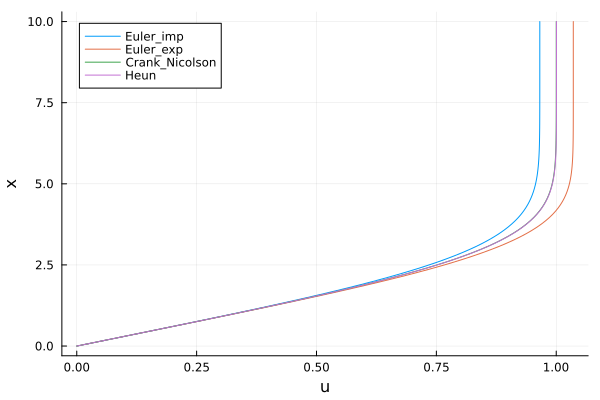

In [19]:
# Calculate λ
### BEGIN SOLUTION
λ = newton_raphson_dual(0., λ -> shooting_residual(λ, tᶠ, tᶠ/1000; alg=Crank_Nicolson))
### END SOLUTION

pl = plot(xlabel="u", ylabel="x")
x₀ = [0., 0., λ]
### BEGIN SOLUTION
for alg in (Euler_imp, Euler_exp, Crank_Nicolson, Heun)
    T, X = solve_ode(x₀, tᶠ, Δ; alg=alg)
    plot!(pl, getindex.(X, 2), T, label=alg)
end
### END SOLUTION
pl

### <font color='orange'>[Exercise 2]</font> Résolution de l'équation de la chaleur

On s'intéresse dans cet exercice à l'équation de la chaleur unidimensionnelle
avec une condition aux limites de Dirichlet homogène et une condition initiale donnée:
$$
\tag{EDP}
\partial_t u = \alpha \partial_x^2 u,
\qquad u(0, t) = u(1, t) = 0,
\qquad u(x, 0) = v(x),
$$
où $v(x) = \sin(\pi x) - \sin(3\pi x) + 2 \sin(4\pi x)$ est une fonction donnée,
et où $\alpha > 0$ est la diffusivité thermique.
Tout au long de cet exercice, on prendra $\alpha = 0.02$.
On admettra qu'il existe une unique solution classique $u(x, t)$ au problème <a>(EDP)</a>,
qui est donnée par
$$
u(x, t) = \sin(\pi x) \mathrm e^{- \alpha \pi^2 t} - \sin(3\pi x) \mathrm e^{- 9 \alpha \pi^2  t} + 2 \sin(4\pi x) \mathrm e^{- 16 \alpha \pi^2 t}.
$$

À titre d'exercice, on pourra vérifier par un calcul que $u$ est bien solution de <a>(EDP)</a>, et conjecturer la forme de la solution pour une condition initiale plus générale $u(x,0) = \sum_{k=1}^N c_k \sin(k\pi x)$.

1. Avec la macro `@anim` de `Plots`, animer l'évolution de de la solution exacte, pour $t \in [0, 1]$.

Plots.AnimatedGif("/tmp/jl_y3ERE54l6X.gif")
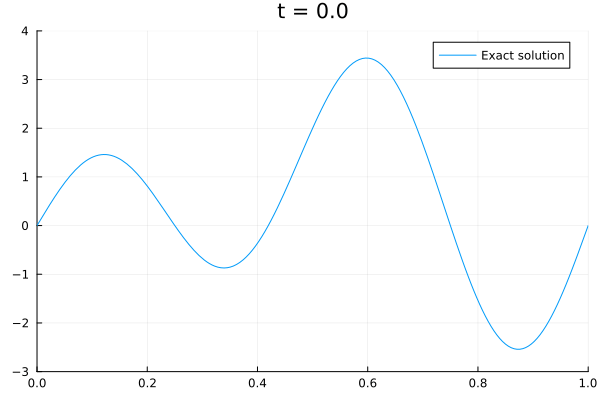

In [20]:
# Thermal diffusivity
const α = .02

# Exact solution
u_exact(x, t) = sinpi(x) * exp(-α*π^2*t) -
                sinpi(3x) * exp(-9α*π^2*t) +
                2sinpi(4*x) * exp(-16α*π^2*t)

# Initial condition
u_init(x) = sinpi(x) - sinpi(3x) + 2sinpi(4*x)
ts = LinRange(0, 1, 50)

### BEGIN SOLUTION
anim = @animate for t in ts
    plot(x -> u_exact(x, t), label="Exact solution")
    title!("t = $(round(t, sigdigits=2))")
    xlims!(0, 1)
    ylims!(-3, 4)
end
### END SOLUTION
gif(anim, fps=5, show_msg=false)

Soit une grille d'abcisses équidistantes
$$
0 = x_0 < x_1 < \dots < x_{N-1} < x_N = 1, \qquad x_i = \frac{i}{N},
$$
et soit $(u_i)_{i \in \{0, \dots N\}}$ la valeur de la solution à ces points.
Aux limites, il est clair que $u_0(t) = u_N(t) = 0$ pour tout $t$.
Aux points intérieurs,
une approximation par différence finie centrale de la dérivée seconde donne
$$
\partial_x^2 u(x_i, t) \approx \frac{1}{Δx^2} \Bigl( u_{i-1}(t) - 2u_i(t) + u_{i+1}(t) \Bigr), \qquad \Delta x = \frac{1}{N}, \qquad i \in \{1, \dotsc, N-1\}.
$$
On en déduit,
par l'équation <a>(EDP)</a> et par la condition initiale,
que le vecteur $\mathbf u(t) = \bigl(u_1(t), \dotsc, u_{N-1}(t) \bigr)^T$ satisfait approximativement l'équation différentielle suivante:
$$
\tag{EDO}
\frac{\mathrm d}{\mathrm d t}
\begin{pmatrix}
    u_1 \\
    u_2 \\
    u_3 \\
    \vdots \\
    u_{N-2} \\
    u_{N-1}
\end{pmatrix}
\approx
\frac{\alpha \mathsf A_N}{Δx^2}
\begin{pmatrix}
    u_1 \\
    u_2 \\
    u_3 \\
    \vdots \\
    u_{N-2} \\
    u_{N-1}
\end{pmatrix}, \qquad
\begin{pmatrix}
    u_1(0) \\
    u_2(0) \\
    u_3(0) \\
    \vdots \\
    u_{N-2}(0) \\
    u_{N-1}(0)
\end{pmatrix} =
\begin{pmatrix}
    v(x_1) \\
    v(x_2) \\
    v(x_3) \\
    \vdots \\
    v(x_{N-2}) \\
    v(x_{N-1})
\end{pmatrix},
$$
où $\mathsf A_N \in \mathbb R^{(N-1)\times (N-1)}$ est la matrice suivante (dimension <font color=red>N-1 x N-1</font>):
$$
\begin{pmatrix}
    -2 & 1 \\
    1 & -2  & 1 \\
       & 1 & -2      & 1 \\
       &    & \ddots & \ddots & \ddots & \\
       &    &        & 1    & -2      & 1 \\
       &    &        &     & 1      & -2 \\
\end{pmatrix}.
$$
L'équation <a>(ODE)</a> n'est qu'approximativement satisfaite par la solution exacte,
mais elle constitue une équation différentielle bien posée dont la résolution fournit une méthode d'approximation de la solution exacte de l'EDP;
c'est la méthode des différences finies.

1. En utilisant la fonction `LinearAlgebra.eigvals`, illustrer en fonction de $N \in \{5, \dotsc 50\}$
   les valeurs propres de la matrice $\mathsf A_N \in \mathbb R^{(N-1) \times (N-1)}$.
   <details>
        <summary>
            <em><font color='gray'>Hint (click to display)</font></em>
        </summary>

    - Il faut dans cet exercice trouver une manière d'illustrer clairement les valeurs propres en fonction de `N`.
    La méthode à utiliser pour ce faire n'est pas imposée,
    mais rappelons que pour des nombres `a` et `b`,
    la commande `scatter([a], [b])` permet de tracer un point en $(a, b)$.
    - La fonction `SymTridiagonal` de `LinearAlgebra` permet de construire efficacement une matrice tridiagonale symétrique.
    </details>

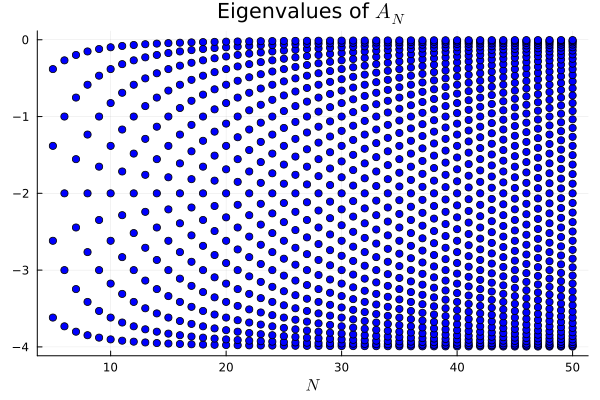

In [29]:
### BEGIN SOLUTION
A(N) = SymTridiagonal(fill(-2, N-1), fill(1, N-2))
p = plot(title=L"Eigenvalues of $A_N$", xlabel=L"N")
for N in 5:50
    scatter!([N], eigvals(A(N))', label=nothing,color=:blue)
end
p
### END SOLUTION

  Si votre réponse au point précédent est bonne,
  il devrait apparaître clairement sur le graphique que les valeurs propres de la matrice $\mathsf A_N$
  sont toutes comprises dans l'intervalle fermé $[-4, 0]$.
  On admettra que toutes les valeurs propres sont en fait,
  pour tout $N$, incluses dans l'intervalle **ouvert** $(-4, 0)$.

  2. Pour résoudre numériquement l'équation différentielle <a>(EDO)</a>,
     on considère tout d'abord la méthode d'Euler explicite:
     $$
     \mathbf u_{n+1} = \mathbf u_{n} + \left(\alpha \frac{\Delta t}{\Delta x^2} \right) \mathsf A_N \mathbf u_{n}.
     $$
     On dira qu'une méthode d'intégration numérique pour <a>(EDP)</a> est stable
     quand, de manière analogue à la solution exacte,
     la solution numérique décroit vers 0 lorsque $n \to \infty$
     (dans n'importe quelle norme, puisque toutes les normes sont équivalentes en dimension finie).
     Trouver un condition **suffisante**,
     en fonction de $\alpha$, $\Delta x$ et $\Delta t$,
     valable pour toute valeur de $N$ et toute condition initiale,
     garantissant la stabilité numérique de la méthode d'Euler explicite.

     <details>
     <summary>
     <em><font color='gray'>Indication (cliquer pour afficher)</font></em>
     </summary>

     - Le schéma d'Euler explicite peut s'écrire comme une simple itération linéaire, pour une certaine matrice symétrique.
     - On pourra utiliser la norme matricielle $\|\cdot\|_2$ subordonnée à la norme Euclidienne, et son interprétation spectrale $\|M\|_2 = \max_{\lambda\in\sigma(M)} |\lambda|$ pour $M$ symétrique.
     </details>

In [22]:
function stab_condition(Δt, Δx, α = α)
    # Should return `true` or `false`
    ### BEGIN SOLUTION
    α * Δt / Δx^2 ≤ 1/2
    ### END SOLUTION
end;

3. Écrire une fonction `solve_pde(Δt, N, tᶠ= 1, alg)` permettant de résoudre approximativement l'équation <a>(ODE)</a> sur l'intervalle de temps $[0, tᶠ]$ par la méthode `alg`,
   avec un pas temps $\Delta t$ et un pas de discrétisation en espace $\Delta x = 1/N$.

   L'argument `alg` doit être une fonction prenant comme arguments `(tₙ, Zₙ, f, Δt)`,
   comme la fonction `euler_exp` donnée ci-dessous,
   et effectuant un pas d'intégration numérique de taille $\Delta t$ pour une équation différentielle générique de la forme $Z' = f(t, Z)$.
   Votre fonction devra renvoyer un vecteur de temps `ts` et un vecteur de vecteurs `us` contenant la solution à ces temps.
   <details>
        <summary>
            <em><font color='gray'>Hint (click to display)</font></em>
        </summary>

    La fonction `push!(vec, x)` permet d'insérer `x` à la fin de la collection `vec`.

    ```julia
        a = [1., 2., 3.]  # typeof(a) = Vector{Float64}
        vec = [a]  # typeof(vec) = Vector{Vector{Float64}}
        push!(vec, [2., 3., 4.])  # vec = [[1.0, 2.0, 3.0], [2.0, 3.0, 4.0]]
    ```
    </details>

In [23]:
euler_exp(tₙ, Zₙ, f, Δt) = Zₙ + Δt*f(tₙ, Zₙ)

function solve_pde(Δt, N, tᶠ; alg=euler_exp)
    # Number of subintervals
    Δx = 1/N

    # Matrix A for N given
    my_A = A(N)

    # Interior discretization points
    x = Δx*(1:N-1)

    ### BEGIN SOLUTION
    u = u_init.(x)
    ts = Δt * (0:ceil(Int, tᶠ/Δt))
    us = [u]

    dudt(t, u) = α/Δx^2 * my_A * u
    for t in ts
        u = alg(t, u, dudt, Δt)
        push!(us, u)
    end
    ### END SOLUTION
    return ts, us
end;

4. Écrire une fonction `animate_solution(ts, us)` qui,
   étant donné `ts` un vecteur de temps,
   et `us` un vecteur de vecteurs qui contient la solution aux temps `ts`,
   renvoie une animation illustrant l'évolution de la solution numérique du problème <a>(PDE)</a>.
   Inclure aussi la solution exacte dans cette animation.
   <details>
        <summary>
            <em><font color='gray'>Hint (click to display)</font></em>
        </summary>

    Les vecteurs dans `us` contiennent la solution aux points intérieurs uniquement.
    Pour améliorer la qualité de la visualisaiton, vous pouvez ajouter les valeurs de la solution aux limites $x_0$ and $x_N$.
    Pour ajouter des éléments au début et à la fin d'un vecteur,
    vous pouvez utiliser la concaténation grâce à `;`

    ```julia
        v1 = [1., 2., 3.]
        v2 = [0.; v1; 0.]  # v2 = [0., 1., 2., 3., 0.]
    ```
    </details>

In [24]:
function animate_solution(ts, us)
    N = length(us[1]) + 1
    Δx = 1/N
    x = Δx*(0:N)

    ### BEGIN SOLUTION
    anim = @animate for (i, t) in enumerate(ts)
        plot(title="t = $(round(t, digits=3))")
        plot!(x -> u_exact(x, t), label="Exact solution")
        plot!(x, [0; us[i]; 0], label="Numerical solution")
        scatter!([x], [0; us[i]; 0], label=nothing)
        xlims!(0, 1)
        ylims!(-3, 4)
    end
    # END SOLUTION

    return anim
end;

- Pour les paramètres $\Delta t$ et $\Delta x$ correspondant à la première animation ci-dessous,
  la méthode d'Euler explicite devrait être **stable**.
  Dans ce cas, la solution numérique en temps long s'approche du vecteur propre associé à la valeur propre la plus petite,
  en valeur absolue, de la matrice $\mathsf A_N$.
  C'est logique, car le schéma d'Euler explicite peut être vu comme une application,
  sans normalisation à chaque pas,
  de la méthode de la puissance itérée pour la matrice $$\mathsf B_N = \mathsf I + \frac{α \Delta t }{ \Delta x^2 } \mathsf A_N.$$

  Pour les paramètres $\Delta t$ et $\Delta x$ correspondant à la seconde animation,
  la méthode d'Euler explicite devrait être **instable**.
  Le profil de l'instabilité en temps long est cette fois-ci donné par le vecteur propre associé à la valeur propre dominante (en valeur absolue) de $\mathsf A_N$.

Stability condition met: true: 0.4
Stability condition met: false: 0.6


Plots.AnimatedGif("/tmp/jl_CjYXoFAfud.gif")
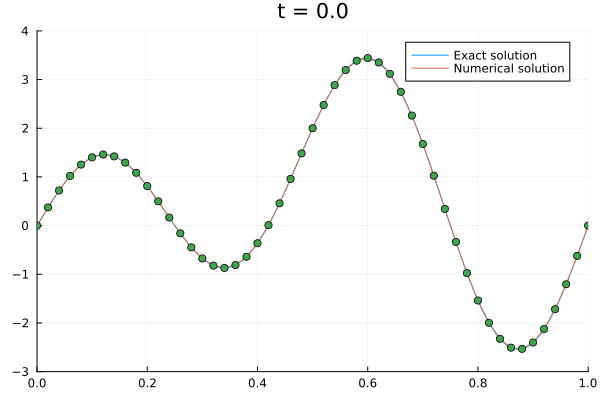

Plots.AnimatedGif("/tmp/jl_Ir29GH6xSH.gif")
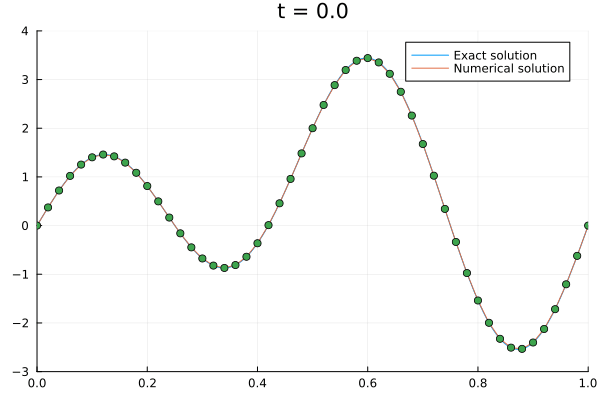

In [25]:
N = 50; Δx = 1/N; 
for Δt in (.008, .012)
    is_stable = stab_condition(Δt, Δx)
    println("Stability condition met: $is_stable: " , α * Δt / Δx^2)
    ts, us = solve_pde(Δt, N, 2.)
    anim = animate_solution(ts, us)
    display(gif(anim, fps = 10, show_msg=false))
end;

5. Écrire une fonction `rk4(tₙ, Zₙ, f, Δ)` implémentant un pas de temps de taille $\Delta$ de la méthode de Runge-Kutta d'ordre 4 pour une équation différentielle générique de la forme $Z' = f(t, Z)$.
   Cette méthode est basée sur l'itération suivante:
   $$
      \mathbf Z_{n+1} = \mathbf Z_n + \frac{\Delta}{6}\left(\mathbf k_1 + 2\mathbf k_2 + 2\mathbf k_3 + \mathbf k_4 \right),
   $$
   où
   \begin{align*}
   \mathbf k_1 &= \ f(t_n, \mathbf Z_n), \\
   \mathbf k_2 &= \ f\!\left(t_n + \frac{\Delta}{2}, \mathbf Z_n + \frac{\Delta}{2} \mathbf k_1\right), \\
   \mathbf k_3 &= \ f\!\left(t_n + \frac{\Delta}{2}, \mathbf Z_n + \frac{\Delta}{2} \mathbf k_2\right), \\
   \mathbf k_4 &= \ f\!\left(t_n + \Delta, \mathbf Z_n + \Delta\mathbf k_3\right).
   \end{align*}
   La fonction devra renvoyer $\mathbf Z_{n+1}$.

In [26]:
function rk4(tₙ, Zₙ, f, Δ)
    ### BEGIN SOLUTION
    k₁ = f(tₙ,       Zₙ           )
    k₂ = f(tₙ + Δ/2, Zₙ + Δ/2 * k₁)
    k₃ = f(tₙ + Δ/2, Zₙ + Δ/2 * k₂)
    k₄ = f(tₙ + Δ  , Zₙ + Δ   * k₃)
    return Zₙ + Δ/6 * (k₁ + 2k₂ + 2k₃ + k₄)
    ### END SOLUTION
end

@assert rk4(0., [0.], (t, Z) -> [1.], 1.) ≈ [1.0]
@assert rk4(1., [0.], (t, Z) -> [t], 1.)  ≈ [3/2]
@assert rk4(0., [0.; 0.], (t, Z) -> [t^2; t^3], 1.) ≈ [1/3; 1/4]

5. Le domaine de stabilité absolue de la méthode de Runge-Kutta d'ordre 4 est illustré ci-dessous.
   Sur base de cette figure, 
   déduire que l'intégration numérique sera stable si
   $$
   \frac{\alpha \Delta t}{\Delta x^2} \leq L \approx \frac{2.75}{4}.
   $$
   Vérifier cette condition numériquement en illustrant la solution pour les paramètres
   $(\Delta x, \Delta t) = (.02, .012)$ and $(\Delta x, \Delta t) = (.02, .015)$.
   La méthode de Runge-Kutta d'ordre 4 est-elle plus ou moins stable que la méthode d'Euler explicite?

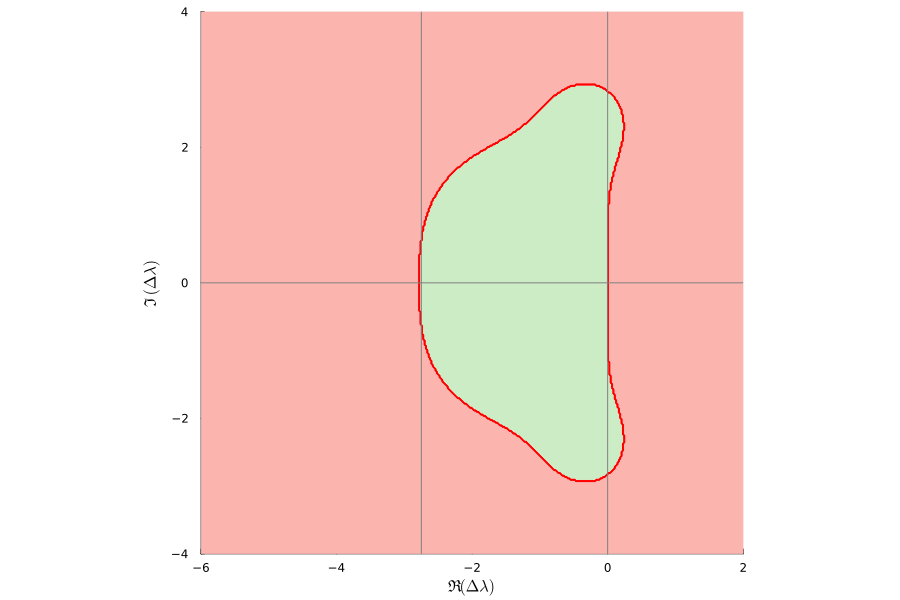

In [27]:
xlims = (-6, 2)
ylims = (-4, 4)
Plots.plot(size=(900, 600))
x = LinRange(xlims..., 400)
y = LinRange(ylims..., 400)
is_method_stable(z, p) = abs(sum(z^i/factorial(i) for i in 0:p)) < 1
stable = is_method_stable.(x' .+ im*y, 4)
Plots.contourf!(x, y, stable, c=:Pastel1_3,
                aspect_ratio=:equal, levels=[0, 1, 2],
                xlabel=L"\Re(\Delta \lambda)",
                ylabel=L"\Im(\Delta \lambda)",
                colorbar=:none, xlims=xlims, ylims=ylims)
Plots.contour!(x, y, stable, levels=5, c=:red)
Plots.vline!([0], color=:gray, label=nothing)
Plots.hline!([0], color=:gray, label=nothing)
Plots.vline!([-2.75], color=:gray, label=nothing)

4α * Δt / Δx^2 = 2.4
4α * Δt / Δx^2 = 2.9999999999999996


Plots.AnimatedGif("/tmp/jl_2xMZIvexKX.gif")
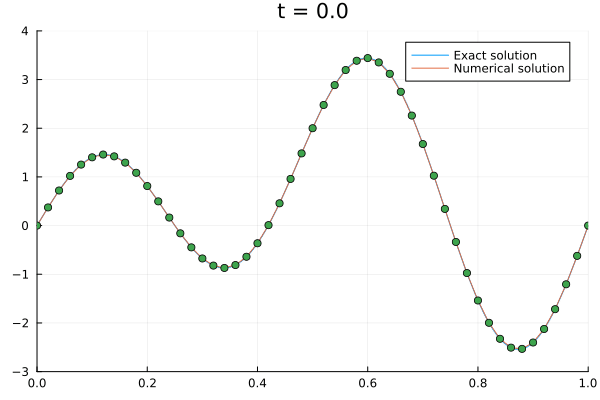

Plots.AnimatedGif("/tmp/jl_ixwZqJExG3.gif")
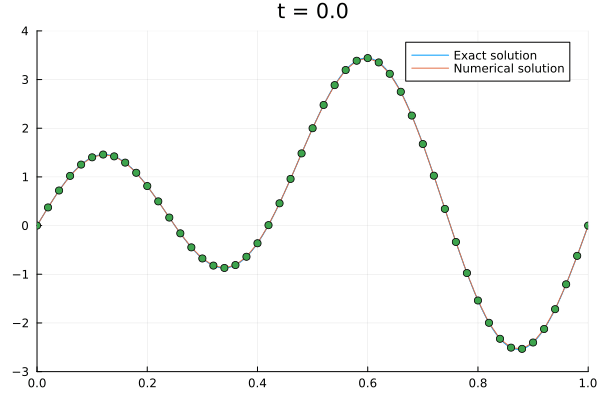

In [28]:
N = 50; Δx = 1/N; Δt = .015
for Δt in (.012, .015)
    println("4α * Δt / Δx^2 = ", 4α * Δt / Δx^2)
    ### BEGIN SOLUTION
    ts, us = solve_pde(Δt, N, 2.; alg=rk4)
    anim = animate_solution(ts, us)
    display(gif(anim, fps = 10, show_msg=false))
    ### END SOLUTION
end;